In [56]:
import pandas as pd

df = pd.read_csv(r"db_files\admins.csv")
df

,admin_id,name
0,1,Robyn Moore
1,2,Ashley Mitchell
2,3,Jonathan Cowan
3,4,Jason Weeks
4,5,Stephanie Cain


In [57]:
users_df = pd.read_csv(r"db_files\users.csv")
household_df = pd.read_csv(r"db_files\households.csv")

In [58]:
total_users_registered = users_df.shape[0]

In [59]:
top_100_users = users_df.sort_values(by='bonus_amount', ascending=False).head(100)
top_100_users

,id,iin,name,phone,bonus_amount,household_id,verified,timestamp,nearest_point,n_longitude,n_latitude
90,91,839019891844,Mr. Bradley Sandoval,001-408-243-9609,500,162,1,2025-02-16 03:45:29.494792,"165 Melissa Radial Suite 477, Melissafurt, AZ ...",76.915666,43.261683
208,209,171023723212,Dale Gonzalez,(289)832-5207x36674,500,154,1,2025-02-16 03:45:29.494792,"71663 Whitaker Loaf Suite 154, Rodriguezfurt, ...",76.987707,43.216539
397,398,763911020133,Frederick Chen,641-713-9428x0204,500,93,1,2025-02-16 03:45:29.494792,"31107 Rice Trail, Amandafurt, MA 96257",76.847936,43.255744
945,946,337866298127,Amy Holmes,(713)800-6522x228,499,154,1,2025-02-16 03:45:29.494792,"23735 Johnson Parks Apt. 183, Christianport, W...",76.739501,43.215736
804,805,949423418167,Deborah Johnson,639.911.2882x329,499,49,1,2025-02-16 03:45:29.494792,"135 Young Wall Suite 875, Russellfort, SD 85990",76.963667,43.349662
...,...,...,...,...,...,...,...,...,...,...,...
744,745,906982076737,Kathleen Gallagher,001-730-375-9228x90223,450,29,1,2025-02-16 03:45:29.494792,"135 Young Wall Suite 875, Russellfort, SD 85990",76.963667,43.349662
249,250,436939902529,Megan Gutierrez,2315999285,450,77,1,2025-02-16 03:45:29.494792,"796 Jillian Harbors Suite 136, Hoodside, NH 39338",76.879602,43.182982
203,204,248349469311,Derrick Lara,404.526.0792,450,163,1,2025-02-16 03:45:29.494792,"089 Wallace Prairie Suite 875, Stevensshire, N...",76.719729,43.364251
637,638,902752529159,Amber Wilson MD,812.576.4354,449,168,1,2025-02-16 03:45:29.494792,"21304 Bennett Prairie Apt. 344, Alisonville, M...",76.633343,43.243103


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge users with household data
merged_df = users_df.merge(household_df, left_on='household_id', right_on='id', suffixes=('_user', '_household'))
users_df['timestamp'] = pd.to_datetime(users_df['timestamp'])

# People per household

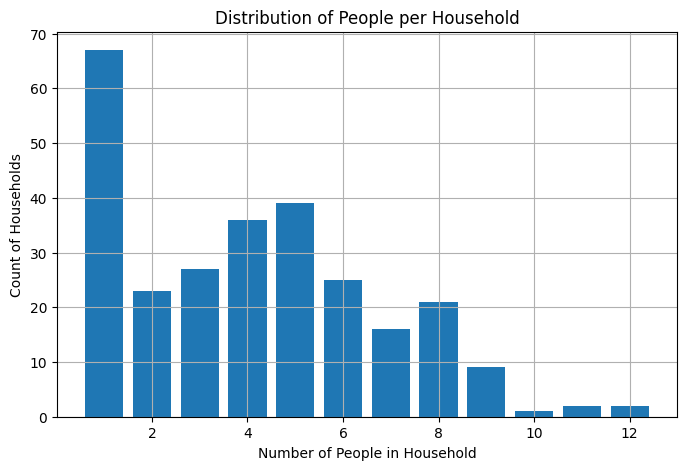

In [61]:
household_counts = merged_df.groupby('household_id')['id_user'].count()
household_counts_df = household_counts.value_counts().sort_index()
plt.figure(figsize=(8, 5))
plt.bar(household_counts_df.index, household_counts_df.values)
plt.xlabel('Number of People in Household')
plt.ylabel('Count of Households')
plt.title('Distribution of People per Household')
plt.grid()
plt.show()

# Most common household structures

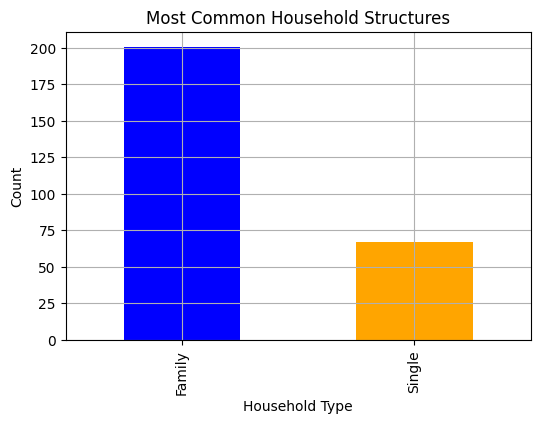

In [62]:
household_counts = merged_df.groupby('household_id')['id_user'].count()
household_categories = household_counts.apply(lambda x: 'Single' if x == 1 else 'Family')
household_structure_counts = household_categories.value_counts()
plt.figure(figsize=(6, 4))
household_structure_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Household Type')
plt.ylabel('Count')
plt.title('Most Common Household Structures')
plt.grid()
plt.show()

# Verification rate

In [63]:
verification_rate = (users_df['verified'].sum() / len(users_df)) * 100
print(f"Verification Rate: {verification_rate:.2f}%")

Verification Rate: 95.82%


# Avg bottles per person

In [64]:
avg_bottles_per_person = household_df['bottle_balance'].sum() / len(users_df)
print(f"Average Bottles Per Person: {avg_bottles_per_person:.2f}")

Average Bottles Per Person: 7.39


# Do larger households consume more water?

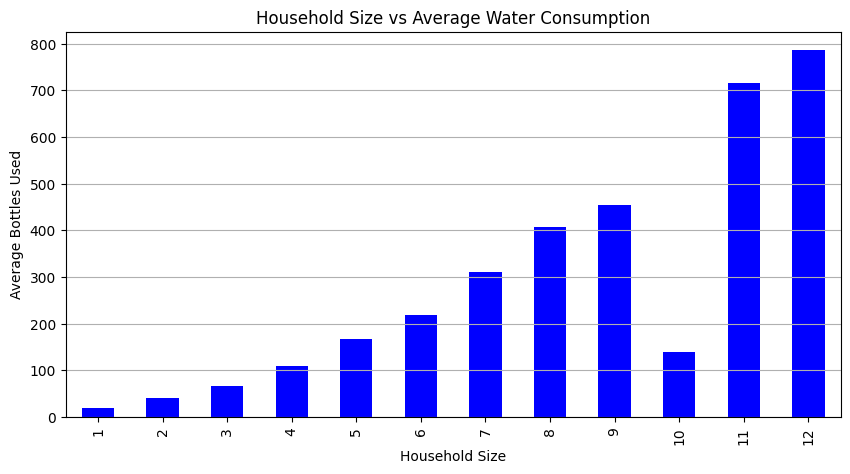

In [65]:
household_water_usage = merged_df.groupby('household_id').agg(
    household_size=('id_user', 'count'),  # Count of users in household
    total_bottles=('bottle_balance', 'sum')  # Total bottle usage
)

# Group by household size to find average water consumption per size
household_avg_usage = household_water_usage.groupby('household_size')['total_bottles'].mean()

# Plot bar chart for household size vs. average water consumption
plt.figure(figsize=(10, 5))
household_avg_usage.plot(kind='bar', color='blue')
plt.xlabel('Household Size')
plt.ylabel('Average Bottles Used')
plt.title('Household Size vs Average Water Consumption')
plt.grid(axis='y')
plt.show()